<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Wild_Blueberry_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s3e14
! unzip '/content/playground-series-s3e14.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [131]:
ds_df = pd.read_csv("/content/data/train.csv")


In [132]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [133]:
ds_df.nunique()

id                      15289
clonesize                   6
honeybee                    7
bumbles                    11
andrena                    16
osmia                      14
MaxOfUpperTRange            6
MinOfUpperTRange            5
AverageOfUpperTRange        5
MaxOfLowerTRange            6
MinOfLowerTRange            7
AverageOfLowerTRange        5
RainingDays                 6
AverageRainingDays          8
fruitset                 1526
fruitmass                1515
seeds                    2066
yield                     776
dtype: int64

In [134]:
ds_df.corr().round(2)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,1.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00
clonesize,0.00,1.00,0.30,0.08,0.07,-0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.17,0.16,-0.41,-0.38,-0.40,-0.38
honeybee,0.01,0.30,1.00,-0.02,0.03,-0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.04,-0.12,-0.14,-0.14,-0.12
bumbles,0.00,0.08,-0.02,1.00,-0.16,0.16,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.06,-0.06,0.16,0.16,0.18,0.16
andrena,0.01,0.07,0.03,-0.16,1.00,0.31,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.03,-0.03,0.07,0.06,0.06,0.07
osmia,0.00,-0.01,-0.01,0.16,0.31,1.00,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.08,-0.08,0.21,0.19,0.20,0.20
MaxOfUpperTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02
MinOfUpperTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02
AverageOfUpperTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02
MaxOfLowerTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02


In [136]:
ds_df.corr()["yield"]

id                      0.000975
clonesize              -0.382619
honeybee               -0.118001
bumbles                 0.161145
andrena                 0.073969
osmia                   0.198264
MaxOfUpperTRange       -0.022517
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
AverageOfLowerTRange   -0.022081
RainingDays            -0.477191
AverageRainingDays     -0.483870
fruitset                0.885967
fruitmass               0.826481
seeds                   0.868853
yield                   1.000000
Name: yield, dtype: float64


# II. Preprocessing

In [137]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [138]:
list(train_df)

['id',
 'clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds',
 'yield']

In [139]:
reg_models = setup(
    data=train_df, target='yield', session_id=123,
    ignore_features=['id', 'MaxOfUpperTRange', 'MinOfUpperTRange',
                     'AverageOfUpperTRange', 'MaxOfLowerTRange',
                     'AverageOfLowerTRange', 'RainingDays'])


,Description,Value
0,Session id,123
1,Target,yield
2,Target type,Regression
3,Original data shape,"(12231, 18)"
4,Transformed data shape,"(12231, 11)"
5,Transformed train set shape,"(8561, 11)"
6,Transformed test set shape,"(3670, 11)"
7,Ignore features,7
8,Numeric features,10
9,Preprocess,True


In [140]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,352.6353,313529.6607,559.4752,0.8230,0.1009,0.0621,1.4940
lightgbm,Light Gradient Boosting Machine,355.7975,315343.6112,561.0624,0.8220,0.1012,0.0628,0.6500
lar,Least Angle Regression,367.0012,323849.9438,568.4374,0.8172,0.1025,0.0650,0.1080
br,Bayesian Ridge,366.9784,323857.6500,568.4473,0.8172,0.1025,0.0650,0.1120
lr,Linear Regression,367.0012,323849.9562,568.4374,0.8172,0.1025,0.0650,1.1020
ridge,Ridge Regression,372.5901,329863.3688,573.8183,0.8138,0.1041,0.0665,0.1000
rf,Random Forest Regressor,364.3453,331431.1141,575.0027,0.8129,0.1031,0.0639,3.1560
lasso,Lasso Regression,374.3505,332752.0438,576.3081,0.8121,0.1043,0.0667,0.1800
llar,Lasso Least Angle Regression,374.3577,332757.5688,576.3130,0.8121,0.1043,0.0667,0.1040
et,Extra Trees Regressor,375.0496,337913.5972,580.8726,0.8092,0.1042,0.0660,2.2820


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

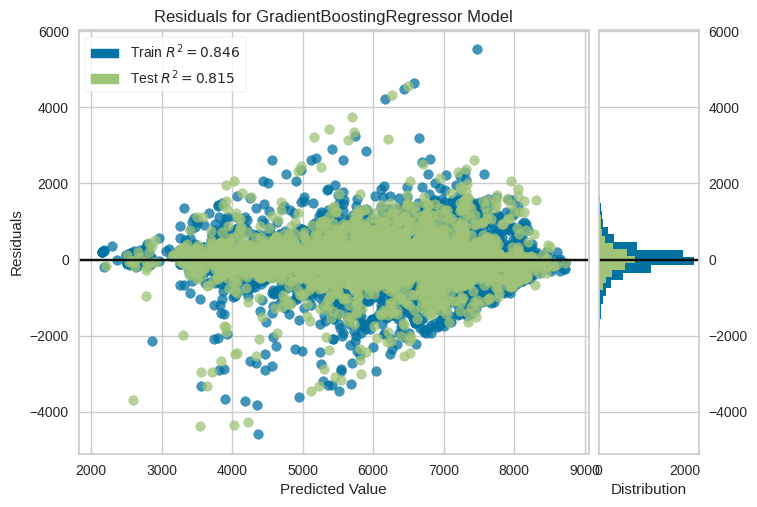

In [141]:
plot_model(best_model)

In [142]:
reg_models2 = setup(
    data=train_df, target='yield', session_id=123,
    ignore_features=['id'])

,Description,Value
0,Session id,123
1,Target,yield
2,Target type,Regression
3,Original data shape,"(12231, 18)"
4,Transformed data shape,"(12231, 17)"
5,Transformed train set shape,"(8561, 17)"
6,Transformed test set shape,"(3670, 17)"
7,Ignore features,1
8,Numeric features,16
9,Preprocess,True


In [143]:
best_model2 = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,352.6574,313499.0493,559.4700,0.8230,0.1009,0.0622,0.9900
lightgbm,Light Gradient Boosting Machine,355.9469,315980.4623,561.5744,0.8216,0.1013,0.0628,0.2740
lr,Linear Regression,367.4064,325129.0125,569.5464,0.8165,0.1028,0.0651,0.1520
br,Bayesian Ridge,367.3881,325204.1062,569.6173,0.8164,0.1028,0.0651,0.1200
rf,Random Forest Regressor,364.2317,330915.5931,574.5630,0.8132,0.1031,0.0639,3.8940
ridge,Ridge Regression,372.5759,331113.2812,574.8589,0.8131,0.1044,0.0665,0.1000
lasso,Lasso Regression,374.7340,332764.1125,576.3184,0.8121,0.1043,0.0668,0.1460
llar,Lasso Least Angle Regression,374.7634,332909.9000,576.4381,0.8120,0.1043,0.0668,0.1060
et,Extra Trees Regressor,378.0693,339862.9877,582.5427,0.8081,0.1045,0.0665,2.9980
xgboost,Extreme Gradient Boosting,377.0545,346312.0312,587.8172,0.8045,0.1057,0.0663,1.3020


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

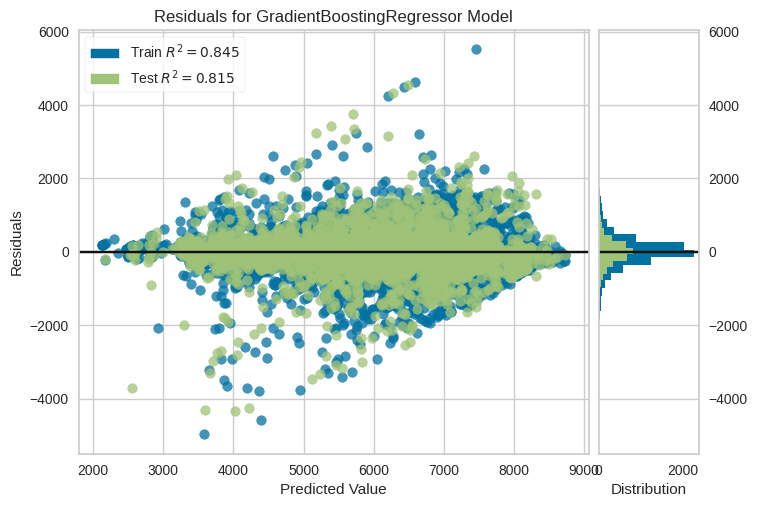

In [145]:
plot_model(best_model2)